### Como realizar Web Scrapping

Para a obtenção do banco de dados usados pela rede neural, torna-se necessário o processo de "Web Scrapping", onde consiste de obter e estruturar dados a partir dos dados não estruturados provenientes dos arquivos html ou xml dos diste

O site escolhido foi o [https://www.airliners.net/](https://www.airliners.net/), pois possui uma base razoavelmente grande de fotos de aviões documentadas, cujo um dos atributos é a empresa correspondente.

### airliners.net

#### Página inicial

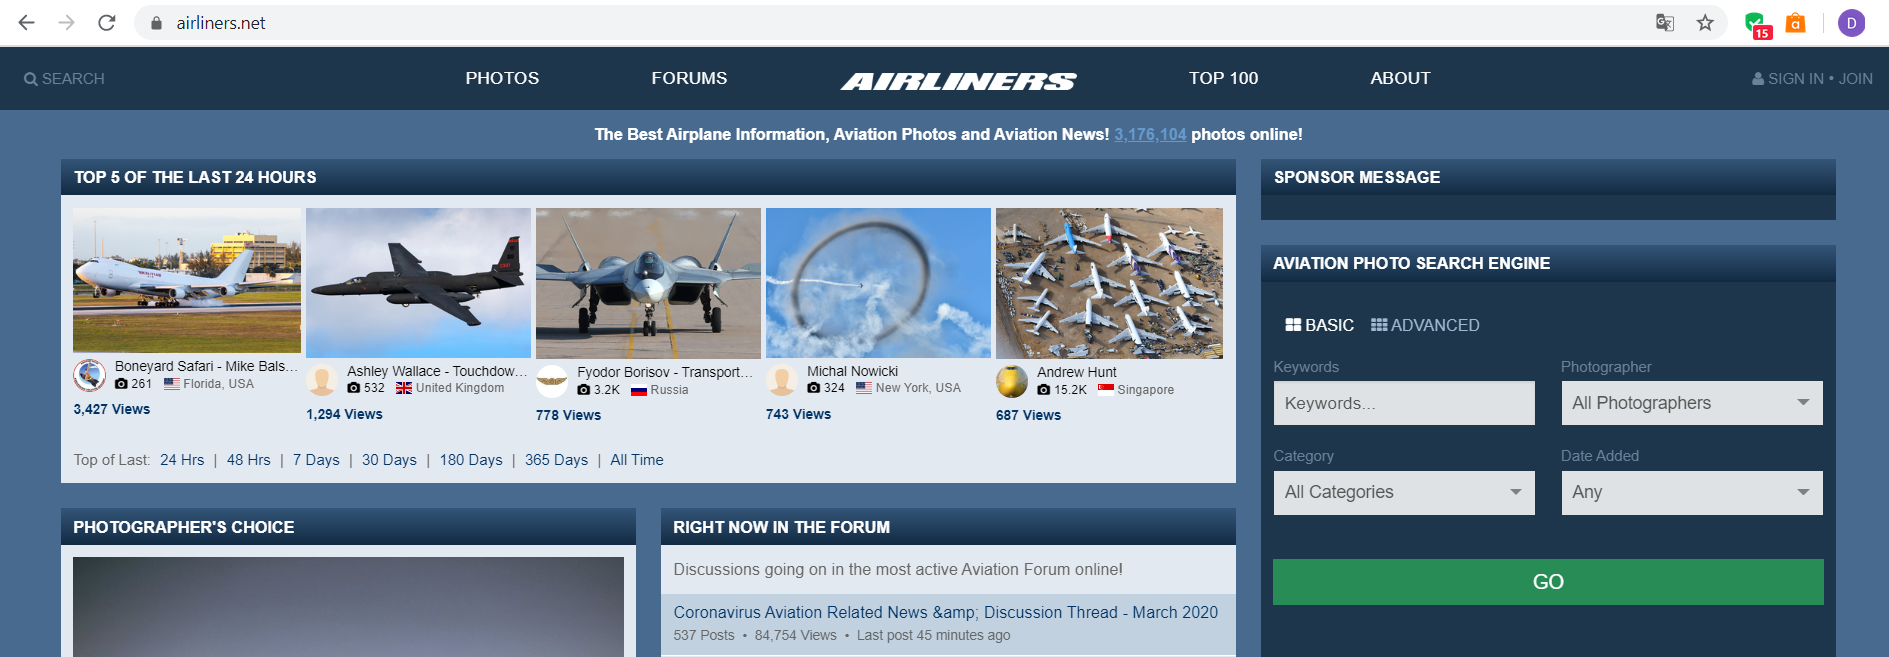

#### Index de fotos

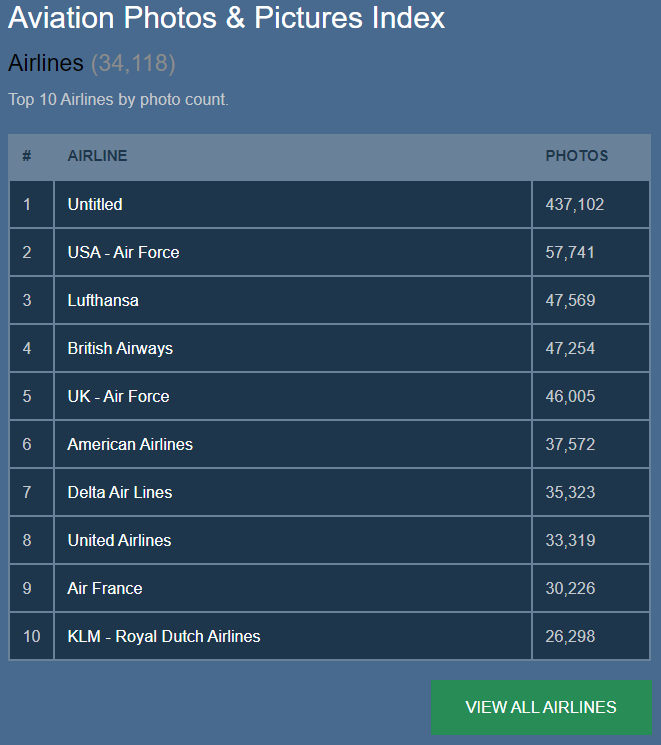

#### Aviões Lufthansa

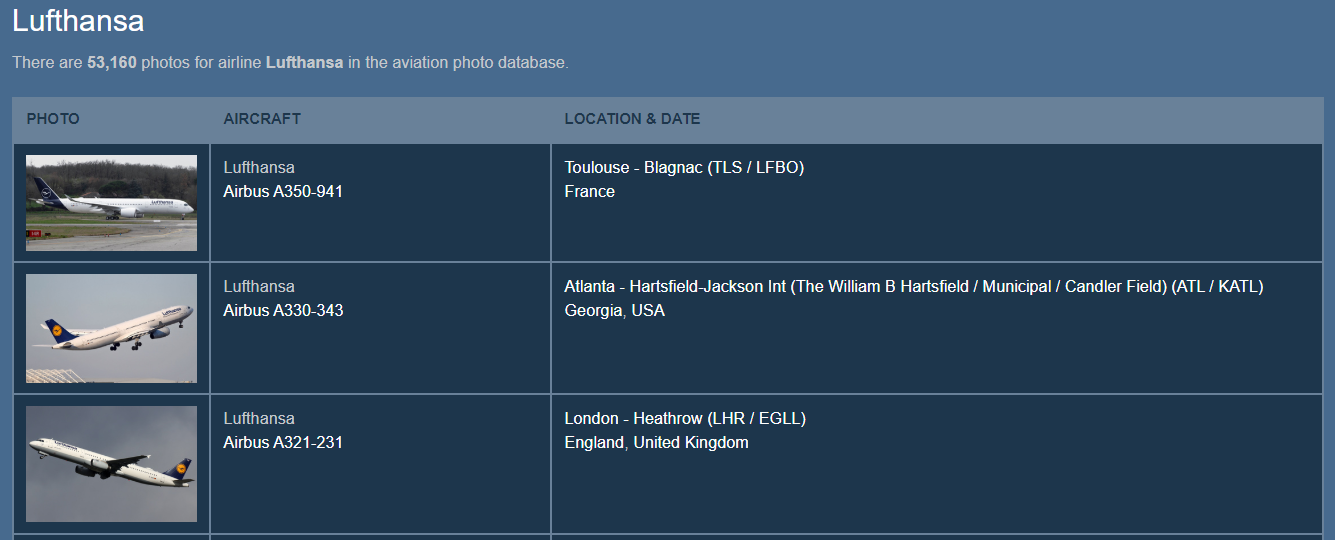

Como desejamos obter as imagens de cada avião, as etapas serão:
* Obter uma tabela com a endereço web correspondente a cada imagem.
* Baixar cada uma dessas imagens.

### Obtendo os endereços web

#### BeautifulSoup

**Beautiful Soup** é uma biblioteca Python de extração de dados de arquivos HTML e XML. Ela funciona com o seu interpretador (**parser**) favorito a fim de prover maneiras mais intuitivas de navegar, buscar e modificar uma árvore de análise (**parse tree**). Ela geralmente economiza horas ou dias de trabalho de programadores ao redor do mundo.

O Beautiful Soup transforma um documento HTML complexo em uma complexa árvore de objetos Python.

O objeto **BeautifulSoup** representa o documento analisado como um todo. Para a maioria dos propósitos, você pode tratá-lo como um objeto Tag. Isso significa que ele suporta a maioria dos métodos descritos em Navegando na árvore e Pesquisando na árvore.

O método **find_all ()** examina os descendentes de uma tag e recupera todos os descendentes que correspondem aos seus filtros.

### Baixando os arquivos

Inspecionando o código html da página, observamos que os dados que desejamos são:

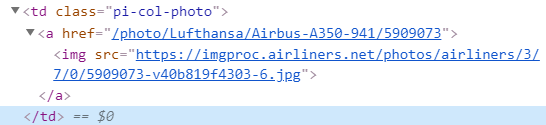

Dessa forma, podemos desenvolver a seguinte função:

In [43]:
def load_images(airline_name, airline_index_number, number_of_pages):
    image_number=0

    for page_number in range(number_of_pages):
        #Cria a URL que será utilizada para a requisição
        URL = 'https://www.airliners.net/index/airlines/' + airline_name + '/' + str(airline_index_number) +'/' + str(1+page_number)
        
        #Objeto Response que contém as informações da página html.
        page = requests.get(URL)
        
        # SoupObject relativo ao documento.
        soup = BeautifulSoup(page.content, 'html.parser')
        
        #Tags relativas aos objetos desejados
        links = soup.findAll('td', attrs={'class':'pi-col-photo'})

        for link in links:
            #Evita que a primeira imagem tenha nome 0.
            image_number+=1
            
            # String contendo o link da imagem, sendo obtida dentro do tag.
            url = link.find('img')['src']
            
            #Faz a requisição da imagem com o link.
            resp = requests.get(url, stream=True)
            
            #Cria o arquivo da imagem.
            if not os.path.exists('C:/airplane_images'):
                os.system("mkdir C:\\airplane_images")
            if not os.path.exists('C:/airplane_images/' + airline_name):
                os.system("mkdir C:\\airplane_images\\" + airline_name)
            image_file = open('C:/airplane_images/' + airline_name + '/' +str(image_number) + '.jpeg',
                              'wb')
            resp.raw.decode_content = True
            shutil.copyfileobj(resp.raw, image_file)
            
            #Fecha o arquivo
            image_file.close()

Dessa forma, a função será responsável por criar uma página e realizar o download de todas as imagens correspondentes a uma determinada companhia aérea.

In [1]:
import requests
from bs4 import BeautifulSoup
import shutil

Dado isso, basta executar:

In [24]:
load_images('Lufthansa', 36265, 1084)

In [48]:
load_images('TAM', 54645, 216)

Os sites utilizados e as informações obtidas foram de:
* [https://www.edureka.co/blog/web-scraping-with-python/](https://www.edureka.co/blog/web-scraping-with-python/).
* [https://requests.readthedocs.io/pt_BR/latest/user/quickstart.html](https://requests.readthedocs.io/pt_BR/latest/user/quickstart.html).
* [https://www.crummy.com/software/BeautifulSoup/](https://www.crummy.com/software/BeautifulSoup/).
* [https://towardsdatascience.com/image-scraping-with-python-a96feda8af2d](https://towardsdatascience.com/image-scraping-with-python-a96feda8af2d).